<a href="https://colab.research.google.com/github/Pablosilvaa/Desafio-Infer-ncia---Tera/blob/main/Desafio_tera_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Background**
### **Depressão e Hábitos Saudáveis**


O transtorno depressivo representa um grande problema de saúde pública e é apontado como uma das principais causas de doenças e debilitações segundo a Organização Mundial da Saúde (OMS). A depressão resulta de uma interação complexa de fatores sociais, psicológicos e biológicos e, embora o acesso a diagnósticos e tratamentos esteja aumentando, muitos ainda não possuem acesso ao controle adequado dos sintomas depressivos.

Para garantir um estilo de vida saudável, a OMS recomenda a prática regular de exercícios, bem como a adoção de uma dieta saudável rica em alimentos in natura e com reduzido teor de gordura saturada, sal e açucares refinados.

Neste desafio, utilizaremos dados de uma pesquisa realizada anualmente nos Estados Unidos para avaliar:


**(1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006**

**(2) Se hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.**


#**Pacotes**


In [53]:
#pacotes instalados que não estavam contidos no repositório oficial do colab
!pip install sweetviz

In [54]:
#Lista de Importações
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz as sv
import matplotlib.pyplot as plt




#**Pré Tratamento Referente a PHQ-9**


In [55]:
#Importando dados
dataSM = pd.read_csv("/content/drive/MyDrive/Tera/Desafio 1/DEMO_PHQ.csv") #dataSM referência a dados do questionário de SAÚDE Mental
dataSM.describe()

,SEQN,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC
count,5334.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,4836.000000,5334.000000,5334.000000,5334.000000,5334.000000,5287.000000
mean,36358.796775,0.307279,0.313069,0.551282,0.717328,0.320720,0.209884,0.230356,0.147849,0.050248,1.519873,45.089989,2.871016,3.233221,8.738604
std,2964.731827,0.758459,0.710683,0.931166,0.913711,0.743057,0.624552,0.639186,0.590390,0.326933,0.499652,20.145853,1.128468,1.268395,12.777756
min,31130.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,1.000000
25%,33838.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36347.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38915.750000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,62.000000,4.000000,4.000000,10.000000
max,41473.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,2.000000,85.000000,5.000000,9.000000,99.000000


In [56]:
#Para facilitar a leitura do dataset, começaremos renomeandos as colunas do dataSM e atribuiremos a essa renomeação de dataSM1
dataSM1 = dataSM.rename(columns = {"SEQN":"ID","DPQ010" : "Desinteresse ou Falta de Prazer ", "DPQ020": "Abatimento ou Falta de Perspectiva", "DPQ030": "Insônia ou Excesso de Sono", "DPQ040": "Cansaço ou Falta de Energia", "DPQ050": "Falta de Apetite ou Excesso na Alimentação","DPQ060": "Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo", "DPQ070": "Falta de Concentração em Atividades Rotineiras", "DPQ080": "Agitação ou Lentidão para hábitos comuns como: Andar e Falar", "DPQ090":"Pensou em Ferir-se ou que era Melhor estar Morto", "RIAGENDR": "Gênero", "RIDAGEYR":"Idade em Anos", "RIDRETH1":"Raça ou Etnia","DMDEDUC":"Escolaridade","INDFMINC":"Renda anual Familiar(US$)"}) #O Processo de alteração se deu por usar as próprias palavras que definem momentos da pessoa que fez parte da pesquisa. 
dataSM1.head()


,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$)
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0


#**Pré Tratamente Referente a HEI**


In [57]:
#importando dados referente ao HEI
dataSA = pd.read_csv("/content/drive/MyDrive/Tera/Desafio 1/PAG_HEI.csv") #DataSA faz alusão a saúde alimentar.




In [58]:
#Para facilitar a leitura do dataset, começaremos renomeandos as colunas do dataSA e atribuiremos a essa renomeação de dataSA. DataSA faz alusão a saúde alimentar.
dataSA1 = dataSA.rename(columns={"SEQN":"ID", "PAG_MINW":"Tempo Total de Atividades moderada-vigorosa em Minutos","ADHERENCE":"Grupo de Aderência ao PAG", "HEI2015C1_TOTALVEG":"Total de Vegetais", "HEI2015C2_GREEN_AND_BEAN":"Verduas e Leguminosas", "HEI2015C3_TOTALFRUIT":"Frutas Totais", "HEI2015C4_WHOLEFRUIT":"Frutas in Natura", "HEI2015C5_WHOLEGRAIN":"Grãos Integrais", "HEI2015C6_TOTALDAIRY":"Laticínios","HEI2015C7_TOTPROT":"Proteínas","HEI2015C8_SEAPLANT_PROT":"Plantas Marinhas e Proteínas Vegetais", "HEI2015C9_FATTYACID":"Ácido-Graxo","HEI2015C10_SODIUM":"Sódio","HEI2015C11_REFINEDGRAIN":"Grãos Refinados", "HEI2015C12_SFAT":"Gordura Saturada", "HEI2015C13_ADDSUG":"Açúcares Adicionados","HEI2015_TOTAL_SCORE":"Escore Total"})
dataSA1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   ID                                                      9424 non-null   int64  
 1   Tempo Total de Atividades moderada-vigorosa em Minutos  7150 non-null   float64
 2   Grupo de Aderência ao PAG                               7150 non-null   float64
 3   Total de Vegetais                                       8549 non-null   float64
 4   Verduas e Leguminosas                                   8549 non-null   float64
 5   Frutas Totais                                           8549 non-null   float64
 6   Frutas in Natura                                        8549 non-null   float64
 7   Grãos Integrais                                         8549 non-null   float64
 8   Laticínios                            

# **Análise Exploratória de Dados - PHQ-9**

In [59]:
#Decidi por não alterar as variáveis quantitativas para qualitativas, pois queria poder mantera sumarização simplificada. Dessa forma, optei (Conversando com o meu amigo Wada) por fazer as variáveis "7" e "9" como 0 de forma a não atrapalhar na hora da sumarização

#checagem de valores
dataSM['DPQ090'].unique()
#para valor 7
7 in dataSM['DPQ090'].unique()
#para valor 9
9 in dataSM['DPQ030'].unique()

#print(dataSM.iloc[1581])


True

In [60]:
#Para cada valores 7, 77, 9 e 99 nós colocaremos o valor 0, pois ambos representam um valor que não contribui para a sumarização
#dataSM1.columns



#Para n = 7 da "coluna Desinteresse ou falta..." até "Pensou em ferir-se ou..."
dataSM1.iloc[:,1:10] = dataSM1.iloc[:,1:10].replace(7, 0)
#Para n = 9 da "coluna Desinteresse ou falta..." até "Pensou em ferir-se ou..."
dataSM1.iloc[:,1:10] = dataSM1.iloc[:,1:10].replace(9, 0)

#Para Escolaridade e N=7
dataSM1.iloc[:,13] = dataSM1.iloc[:,13].replace(7, 0)
#Para Escolaridade e N=9
dataSM1.iloc[:,13] = dataSM1.iloc[:,13].replace(9, 0)

#Para Renda com n = 77
dataSM1.iloc[:,14] = dataSM1.iloc[:,14].replace(77, 0)
#Para Renda com n = 99
dataSM1.iloc[:,14] = dataSM1.iloc[:,14].replace(99, 0)





In [61]:
#Agora vamos lidar com os elementos NaN
dataSM1.head(59)

#Vamos usar o comando describe para comparar com esse data set sem linhas com "NaN"


,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$)
0,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,85,3,4,4.0
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2,59,4,3,7.0


In [62]:
dataSM1_No_NaN = dataSM1.dropna()

dataSM1_No_NaN.describe()
#Comparando os datasets dataSM1 e com DataSM1_No_NaN vemos que não existe  muita diferenta entre eles, portanto vamos manter a exclusão das linhas com dados faltantes(NaN)

,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$)
count,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000,4800.000000
mean,36351.613750,0.291042,0.303542,0.537083,0.707500,0.311458,0.200417,0.222083,0.130833,0.046250,1.517708,45.027083,2.869167,3.259375,6.831250
std,2973.514924,0.660311,0.654021,0.872754,0.873223,0.698191,0.556685,0.586942,0.448618,0.271495,0.499738,19.899605,1.111968,1.248135,3.249034
min,31131.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,0.000000,0.000000
25%,33824.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,27.000000,3.000000,2.000000,4.000000
50%,36350.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,43.000000,3.000000,3.000000,7.000000
75%,38920.250000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,61.000000,4.000000,4.000000,10.000000
max,41473.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,85.000000,5.000000,5.000000,13.000000


In [63]:
dataSM1_No_NaN.head(59)

,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$)
1,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0
2,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0
3,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0
4,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0
5,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0
6,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0
7,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0
8,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0
9,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2,59,4,3,7.0
10,31152,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2,27,1,3,7.0


# **Análise Exploratória de Dados HEI**


In [64]:
dataSA1


,ID,Tempo Total de Atividades moderada-vigorosa em Minutos,Grupo de Aderência ao PAG,Total de Vegetais,Verduas e Leguminosas,Frutas Totais,Frutas in Natura,Grãos Integrais,Laticínios,Proteínas,Plantas Marinhas e Proteínas Vegetais,Ácido-Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total
0,31128,NaN,NaN,3.083350,0.000000,3.927008,5.000000,0.000000,5.000000,4.251329,0.000000,2.487572,6.911882,10.000000,0.818029,6.408092,47.887262
1,31129,285.450346,2.0,1.697761,0.000000,3.731602,4.929186,0.527631,3.887809,4.693141,0.928562,3.740758,6.146441,7.274979,8.006457,0.000000,45.564326
2,31130,0.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31131,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899
4,31132,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9419,41469,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323
9420,41471,951.478060,3.0,2.674192,3.769401,2.198817,0.517369,0.463168,4.662005,5.000000,1.191796,6.145146,3.189620,3.766149,3.974279,7.758940,45.310883
9421,41472,27.713626,1.0,2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467
9422,41473,685.912240,3.0,3.907340,5.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000,0.000000,7.458058,10.000000,1.676912,2.751168,45.793478


In [65]:
#Como existem linhas que têm todos os valores NaN, então primeiro vamos focar em deletar somente elas.
dataSA1_WRN = dataSA1.dropna(axis = 0, thresh=13)

#escolher theresh = 12, porque decidi optar por ter uma conjunto de dados, onde mantenha linhas com no mínimo 13 elementos NÃO NULOS

In [66]:
dataSA1_WRN.isnull().sum()

ID                                                           0
Tempo Total de Atividades moderada-vigorosa em Minutos    1970
Grupo de Aderência ao PAG                                 1970
Total de Vegetais                                            0
Verduas e Leguminosas                                        0
Frutas Totais                                                0
Frutas in Natura                                             0
Grãos Integrais                                              0
Laticínios                                                   0
Proteínas                                                    0
Plantas Marinhas e Proteínas Vegetais                        0
Ácido-Graxo                                                  0
Sódio                                                        0
Grãos Refinados                                              0
Gordura Saturada                                             0
Açúcares Adicionados                                   

# **Combinando os dois bancos**


In [67]:
#a chave SEQN foi defenida como "ID"
newdataS = dataSM1_No_NaN.merge(dataSA1_WRN, on = 'ID', how = 'left')


In [68]:
print(newdataS)

#Aqui podemos ver que conseguimos exatamente às 5334 que nos foram pedidas. 

         ID  ...  Escore Total
0     31131  ...     35.553899
1     31132  ...     63.551696
2     31134  ...     42.886826
3     31139  ...     47.074393
4     31143  ...     46.086131
...     ...  ...           ...
4795  41466  ...     59.949915
4796  41468  ...     57.747869
4797  41469  ...     42.993323
4798  41472  ...     46.134467
4799  41473  ...     45.793478

[4800 rows x 31 columns]


# **Criando variáveis requisitadas no Desafio Inferência**




##**Variável PHQ9**

In [69]:
#listando número de colunas para facilitar a criação da variável PHQ9
list(newdataS)

['ID',
 'Desinteresse ou Falta de Prazer ',
 'Abatimento ou Falta de Perspectiva',
 'Insônia ou Excesso de Sono',
 'Cansaço ou Falta de Energia',
 'Falta de Apetite ou Excesso na Alimentação',
 'Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo',
 'Falta de Concentração em Atividades Rotineiras',
 'Agitação ou Lentidão para hábitos comuns como: Andar e Falar',
 'Pensou em Ferir-se ou que era Melhor estar Morto',
 'Gênero',
 'Idade em Anos',
 'Raça ou Etnia',
 'Escolaridade',
 'Renda anual Familiar(US$)',
 'Tempo Total de Atividades moderada-vigorosa em Minutos',
 'Grupo de Aderência ao PAG',
 'Total de Vegetais',
 'Verduas e Leguminosas',
 'Frutas Totais',
 'Frutas in Natura',
 'Grãos Integrais',
 'Laticínios',
 'Proteínas',
 'Plantas Marinhas e Proteínas Vegetais',
 'Ácido-Graxo',
 'Sódio',
 'Grãos Refinados',
 'Gordura Saturada',
 'Açúcares Adicionados',
 'Escore Total']

In [70]:
#col_list = list(newdataS)
newdataS['PHQ9']= newdataS['Desinteresse ou Falta de Prazer '] + newdataS['Abatimento ou Falta de Perspectiva'] + newdataS['Insônia ou Excesso de Sono'] + newdataS['Cansaço ou Falta de Energia'] + newdataS['Falta de Apetite ou Excesso na Alimentação'] + newdataS['Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo'] + newdataS['Falta de Concentração em Atividades Rotineiras'] + newdataS['Agitação ou Lentidão para hábitos comuns como: Andar e Falar'] + newdataS['Pensou em Ferir-se ou que era Melhor estar Morto']

newdataS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4799
Data columns (total 32 columns):
 #   Column                                                                               Non-Null Count  Dtype  
---  ------                                                                               --------------  -----  
 0   ID                                                                                   4800 non-null   int64  
 1   Desinteresse ou Falta de Prazer                                                      4800 non-null   float64
 2   Abatimento ou Falta de Perspectiva                                                   4800 non-null   float64
 3   Insônia ou Excesso de Sono                                                           4800 non-null   float64
 4   Cansaço ou Falta de Energia                                                          4800 non-null   float64
 5   Falta de Apetite ou Excesso na Alimentação                                           4800 

##**Variável PHQ_GRP**

In [71]:
#newdataS['PHQ_GRP'] = pd.cut[newdataS, bins = [0<5.1, 5 <= 10.2,10<=15.3, 15<=19, >=20], labels = ["Sem_Sintomas", "Sintomas_Leves", "Sintomas_Moderados", "Sintomas_Moderadamente_Severos", "Sintomas_Severos"])

def grp_sint(newdataS):


    if newdataS['PHQ9'] < 5:
        return 'Sem Sintomas'
    elif 5 <= newdataS['PHQ9'] < 10:
        return 'Sintomas Leves'
    elif 10 <= newdataS['PHQ9'] < 15:
        return "Sintomas Moderados"
    elif 15 <= newdataS['PHQ9'] < 19:
        return "Sintomas moderadamente Severos"
    else:
        return "Sintomas Severos"
      
#Créditos andré que me ajudou bastante nessa parte









In [72]:
#Adicionando PHQ_GRP na tabela
newdataS['PHQ_GRP'] = newdataS.apply(grp_sint, axis = 1)


In [73]:
#Checando

newdataS.head(10)

,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$),Tempo Total de Atividades moderada-vigorosa em Minutos,Grupo de Aderência ao PAG,Total de Vegetais,Verduas e Leguminosas,Frutas Totais,Frutas in Natura,Grãos Integrais,Laticínios,Proteínas,Plantas Marinhas e Proteínas Vegetais,Ácido-Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves
5,31144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0,1720.554273,3.0,2.025145,0.000000,2.205125,0.000000,0.000000,5.000000,1.153747,0.000000,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008,0.0,Sem Sintomas
6,31149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,2,1.0,41.570439,1.0,5.000000,0.000000,2.147766,4.295533,0.000000,4.361618,5.000000,0.000000,4.780404,0.000000,5.138144,5.601160,4.677064,41.001689,0.0,Sem Sintomas
7,31150,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0,1254.041570,3.0,2.499002,0.000000,5.000000,5.000000,5.000000,5.000000,4.093324,0.000000,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972,1.0,Sem Sintomas
8,31151,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2,59,4,3,7.0,138.568129,1.0,0.849132,0.000000,0.023828,0.000000,2.287457,5.000000,5.000000,5.000000,2.805860,9.298090,10.000000,6.738039,0.000000,47.002405,3.0,Sem Sintomas
9,31152,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2,27,1,3,7.0,990.762125,3.0,5.000000,1.347104,0.014032,0.000000,0.972908,5.000000,5.000000,4.546475,3.042452,1.362072,6.405209,1.726454,9.879221,44.295927,3.0,Sem Sintomas


# **Variável Grupo de Aderência ao PAG** 


In [74]:
# Nós assim como a variaǘel PHQ_GRP, vamos criar uma nova variável para que possamos ter um controle de qiuem faz parte do grupo de aderência

def group_ad(newdataS):
    if newdataS['Grupo de Aderência ao PAG'] == 1:
        return 'Baixo(< 150 min/semana)'
    elif newdataS['Grupo de Aderência ao PAG'] == 2:
        return 'Adequado(150-300 min/semana)'
    else:
        return 'Acima(>300 min/semana)'

        

In [75]:
#Grupo de Aderência ao PAG
newdataS ['Grupo de Aderência ao PAG']= newdataS.apply(group_ad, axis = 1)


In [76]:
#Testando alteração
newdataS

,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$),Tempo Total de Atividades moderada-vigorosa em Minutos,Grupo de Aderência ao PAG,Total de Vegetais,Verduas e Leguminosas,Frutas Totais,Frutas in Natura,Grãos Integrais,Laticínios,Proteínas,Plantas Marinhas e Proteínas Vegetais,Ácido-Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,Adequado(150-300 min/semana),3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,Acima(>300 min/semana),3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,Acima(>300 min/semana),2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,Acima(>300 min/semana),5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,Acima(>300 min/semana),2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,Baixo(< 150 min/semana),2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas
4796,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,Adequado(150-300 min/semana),5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados
4797,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,Adequado(150-300 min/semana),2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas
4798,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,27.713626,Baixo(< 150 min/semana),2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas


# **Análise de Variaveis** 

In [77]:
newdataS

,ID,Desinteresse ou Falta de Prazer,Abatimento ou Falta de Perspectiva,Insônia ou Excesso de Sono,Cansaço ou Falta de Energia,Falta de Apetite ou Excesso na Alimentação,"Sentiu-se: Mal consigo mesmo, Fracassado ou que Decepcionou a Família ou a Si mesmo",Falta de Concentração em Atividades Rotineiras,Agitação ou Lentidão para hábitos comuns como: Andar e Falar,Pensou em Ferir-se ou que era Melhor estar Morto,Gênero,Idade em Anos,Raça ou Etnia,Escolaridade,Renda anual Familiar(US$),Tempo Total de Atividades moderada-vigorosa em Minutos,Grupo de Aderência ao PAG,Total de Vegetais,Verduas e Leguminosas,Frutas Totais,Frutas in Natura,Grãos Integrais,Laticínios,Proteínas,Plantas Marinhas e Proteínas Vegetais,Ácido-Graxo,Sódio,Grãos Refinados,Gordura Saturada,Açúcares Adicionados,Escore Total,PHQ9,PHQ_GRP
0,31131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,Adequado(150-300 min/semana),3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,Sem Sintomas
1,31132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,Acima(>300 min/semana),3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,Sem Sintomas
2,31134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,Acima(>300 min/semana),2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,Sem Sintomas
3,31139,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,Acima(>300 min/semana),5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,Sem Sintomas
4,31143,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,Acima(>300 min/semana),2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,Sintomas Leves
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,41466,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,Baixo(< 150 min/semana),2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,Sem Sintomas
4796,41468,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,Adequado(150-300 min/semana),5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,Sintomas Moderados
4797,41469,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,Adequado(150-300 min/semana),2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,Sem Sintomas
4798,41472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,34,3,4,7.0,27.713626,Baixo(< 150 min/semana),2.457422,2.930799,2.311917,0.000000,0.933303,5.000000,5.000000,5.000000,2.090534,8.409844,8.936854,3.063795,0.000000,46.134467,0.0,Sem Sintomas


In [78]:
#Relatório temporário 


import webbrowser

webbrowser.open('https://drive.google.com/file/d/1rlzAubpzlXbbJZ99FaqzQUdAz9Z7W4YM/view?usp=sharing')

#É necessário baixar e depois abrir para que seja possível visualizar o arquivo. PS: esse é um arquivo gerado pelo sweetviz

False

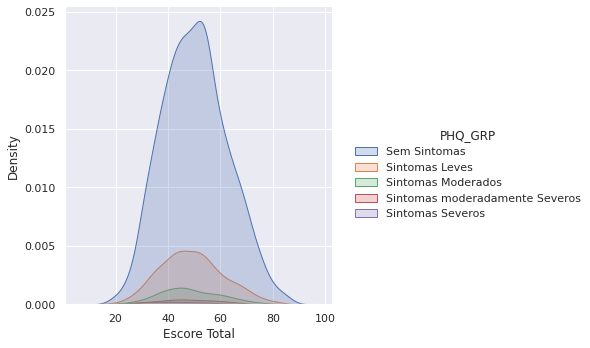

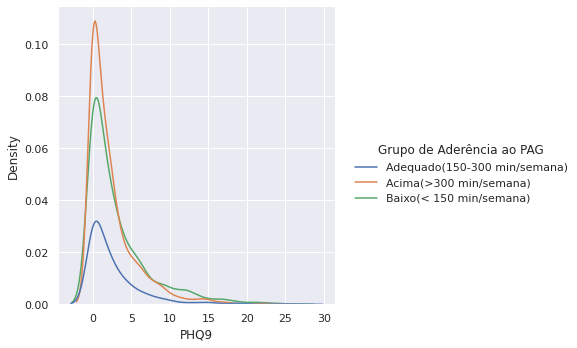

In [101]:
#sns.catplot(x="Escore Total", y="PHQ9", hue="Grupo de Aderência ao PAG", kind="swarm", data= newdataS)
sns.set(rc={'figure.figsize':(11.7,8.27)})


sns.displot(newdataS, x="Escore Total", hue="PHQ_GRP", kind="kde", fill=True)
sns.displot(newdataS, x="PHQ9", hue="Grupo de Aderência ao PAG", kind="kde", fill=False)



#**Final**

##**Não consegui terminar o Projeto**

Foram diversos motivos que imputo culpa:


1.   Demorei um tanto par começar o projeto;
2.   Falta de dominio com a linguagem de programação, isto inclui a parte de função e estruturas de repetição;
3.   Falta de domínio com teste estatistos.

Todas esses problemos tomo como culpa minha. Me faltou mais organizaçaõ para terminar o projeto. Entretanto, estou enviando esse projeto para que ele seja jugado e eu possa receber o devido feedback.


Insights:

1 - Segundo a minha análise, A maioria das **pessoas com alimentação  mediana**, isto é: com escore tentendo a 50, têm não apresentam sintomas de depressão
2 - A grande maioria das Pessoas que aderiram ao PAG, isto é: Mais de 90% das pessoas contidas nesses dados tem um PHQ9 < 10 que é considerado como sintoma leve.



